In [1]:
import argparse, random, pprint, os
from tqdm import tqdm_notebook as tqdm
from options.options import parse_opt
from utils import utils

from data import create_dataloader
from solver.HourGlassSover import HourGlassSover

In [2]:
parser = argparse.ArgumentParser(description='Train Hourglass Model')
parser.add_argument('-opt', type=str, required=True, help='Path to options JSON file.')
opt = parse_opt(parser.parse_args(['-opt', './options/train/train_hg_check.json']).opt)

In [3]:
pprint.pprint(opt)

{'datasets': {'train': {'annotation_path': '/opt/data4/Face_dataset/CelebA/CelebA/Anno/list_landmarks_align_celeba.txt',
                        'batch_size': 80,
                        'flip_h': True,
                        'flip_v': True,
                        'gt_sigma': 1.5,
                        'image_root': '/opt/data4/jzy/dataset/Face_dataset/CelebA/img_align_celeba',
                        'input_length': 128,
                        'mean': [0.509, 0.424, 0.378],
                        'num_keypoints': 5,
                        'num_workers': 8,
                        'partition_path': '/opt/data4/Face_dataset/CelebA/CelebA/Eval/list_eval_partition.txt',
                        'phase': 'train',
                        'rotate': True,
                        'type': 'celebA'},
              'val': {'annotation_path': '/opt/data4/Face_dataset/CelebA/CelebA/Anno/list_landmarks_align_celeba.txt',
                      'batch_size': 1,
                      'flip_h': Fa

In [4]:
train_dl = create_dataloader(opt['datasets']['train'])
print('===> Train Dataset created, Number of images: [%d]' % (len(train_dl) * opt['datasets']['train']['batch_size']))
val_dl = create_dataloader(opt['datasets']['val'])
print('===> Validation Dataset created, Number of images: [%d]' % (len(val_dl)))

===> Train Dataset created, Number of images: [162800]
===> Validation Dataset created, Number of images: [19867]


In [5]:
solver = HourGlassSover(opt)

===> Network Summary

StackedHourGlass(
  (pre_conv_block): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): ResidualBlock(
      (conv_block): Sequential(
        (0): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace)
        (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (5): ReLU(inplace)
        (6): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1))
        (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (skip_layer): Sequential(
        (0): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1))
        (1): BatchNorm2d(128, eps=1e-05, m

===> Solver Initialized : [HourGlassSover] || Use GPU : [True]
optimizer:  Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    initial_lr: 0.0001
    lr: 0.0001
    weight_decay: 0
)
lr_scheduler milestones: [2, 4, 6, 8]   gamma: 0.200000


In [6]:
it = iter(val_dl)

0.015616639990513886


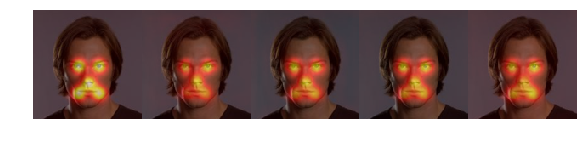

In [29]:
sample = next(it)
solver.feed_data(sample)
loss = solver.evaluate()
nme = solver.calc_nme()
print(nme)
fig = solver.get_current_visual()